In [13]:
import pickle
import torch
import numpy as np

with open('pcl_c101_features_res2net_ffm_759.pkl', 'rb') as f:
    loaded_features = pickle.load(f)
loaded_features = torch.squeeze(loaded_features)

print(loaded_features.shape)
loaded_feature_numpy = loaded_features.cpu().numpy()

print(loaded_feature_numpy)

torch.Size([400, 2048])
[[0.09851351 0.05694005 0.04894834 ... 0.09219962 0.3061726  0.21118908]
 [0.01322544 0.07010717 0.05584321 ... 0.08160329 0.12525335 0.03830294]
 [0.04108307 0.03773072 0.07336722 ... 0.04338422 0.1730841  0.01186443]
 ...
 [0.07879984 0.04871019 0.09121817 ... 0.05729396 0.2366625  0.16316402]
 [0.06542406 0.02217865 0.04789275 ... 0.03716593 0.03832091 0.09438644]
 [0.08936873 0.02614637 0.0313149  ... 0.13681683 0.02502081 0.04028167]]


In [14]:
import csv

# CSV檔案路徑
csv_file_path = "/mnt/backups/kevin/PCL_FFM/PCL/test_pcl_c101_4class.csv"

# 儲存groundtruth的陣列
ground_truth = []

# 開啟CSV檔案，並讀取groundtruth值
with open(csv_file_path, mode='r') as file:
    csv_reader = csv.reader(file)
    # 跳過標題列
    next(csv_reader)
    # 讀取每一列，將groundtruth值存入陣列
    for row in csv_reader:
        ground_truth.append(int(row[1]))

# 印出groundtruth陣列
print(len(ground_truth))
print(ground_truth)


400
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9

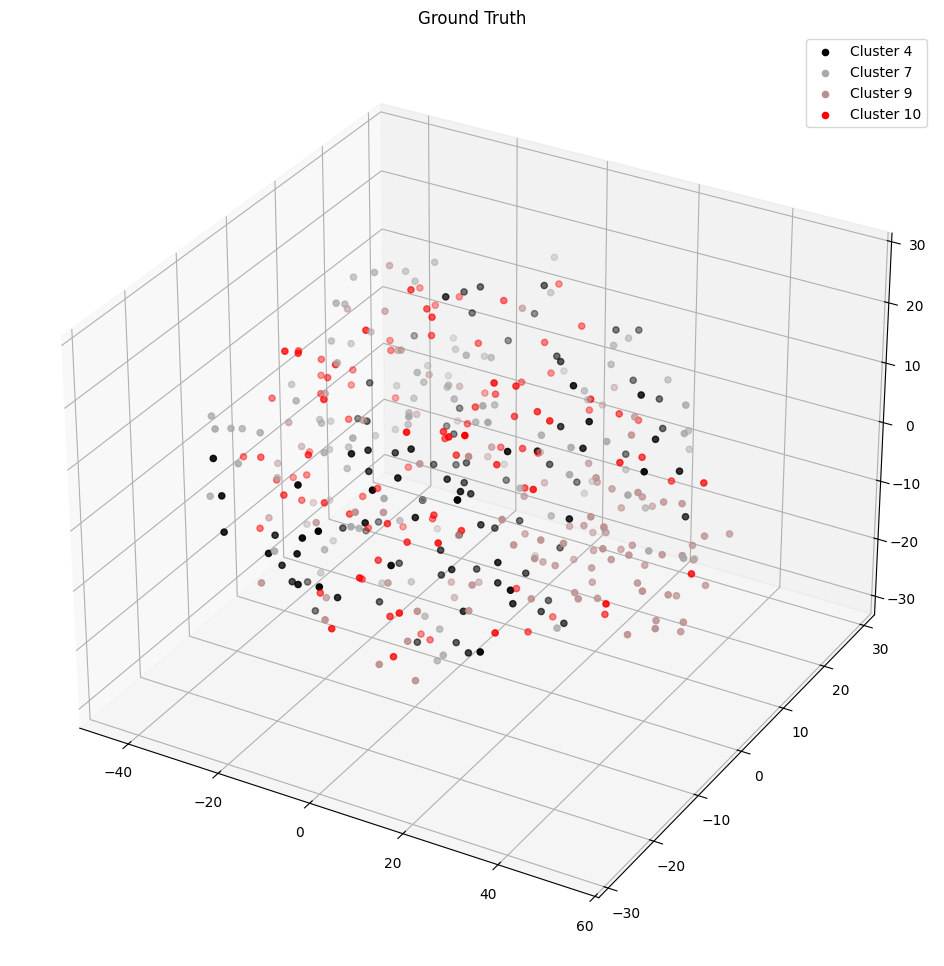

In [16]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(loaded_feature_numpy)

tsne = TSNE(n_components=3)
data_pca = tsne.fit_transform(loaded_feature_numpy)

labels = [item+1 for item in labels]

# 画出原始数据的3D散点图
plt.figure(figsize=(12, 12))
n_colors = 12
ax = plt.axes(projection='3d')
cluster_colors = ['black', 'darkgray', 'rosybrown', 'red', 'chocolate',
                'darkorange','tan','yellow','greenyellow','forestgreen',
                 'blue','green']
unique_labels = np.unique(ground_truth)
for i, label in enumerate(unique_labels):
    cluster_mask = (ground_truth == label)
    ax.scatter(
        data_pca[cluster_mask, 0],
        data_pca[cluster_mask, 1],
        data_pca[cluster_mask, 2],
        label=f'Cluster {label}',
        color=cluster_colors[i % n_colors]  # Use custom colors from the list
    )
plt.title('Ground Truth')
plt.legend()
plt.show()


In [17]:
from collections import Counter

# 將樣本和其群組分配結合，形成新數據集
combined_data = list(zip(labels, ground_truth))

# 創建一個列表，每個元素都是一個空列表
temp_lists = [[] for _ in range(1, 13)]

# 根據群組將數據分配到不同的列表中
for x in combined_data:
    temp_lists[x[0] - 1].append(x[1])

# 遍歷temp_lists，印出每個群的元素比例
for i, temp_list in enumerate(temp_lists, start=1):
    element_counts = Counter(temp_list)
    total_elements = len(temp_list)
    element_percentages = {key: count / total_elements for key, count in element_counts.items()}
    print(element_counts)
    print(f'第 {i} 群 : {total_elements}個')
    for key, percentage in element_percentages.items():
        print(f"第 {key} 類: {percentage:.2%}", end=' ')
    print()


Counter({10: 47, 7: 45, 4: 43, 9: 24})
第 1 群 : 159個
第 4 類: 27.04% 第 7 類: 28.30% 第 9 類: 15.09% 第 10 類: 29.56% 
Counter({4: 37, 7: 30, 10: 30, 9: 7})
第 2 群 : 104個
第 4 類: 35.58% 第 7 類: 28.85% 第 9 類: 6.73% 第 10 類: 28.85% 
Counter({9: 60, 7: 22, 4: 17, 10: 9})
第 3 群 : 108個
第 4 類: 15.74% 第 7 類: 20.37% 第 9 類: 55.56% 第 10 類: 8.33% 
Counter({10: 14, 9: 9, 4: 3, 7: 3})
第 4 群 : 29個
第 4 類: 10.34% 第 9 類: 31.03% 第 10 類: 48.28% 第 7 類: 10.34% 
Counter()
第 5 群 : 0個

Counter()
第 6 群 : 0個

Counter()
第 7 群 : 0個

Counter()
第 8 群 : 0個

Counter()
第 9 群 : 0個

Counter()
第 10 群 : 0個

Counter()
第 11 群 : 0個

Counter()
第 12 群 : 0個



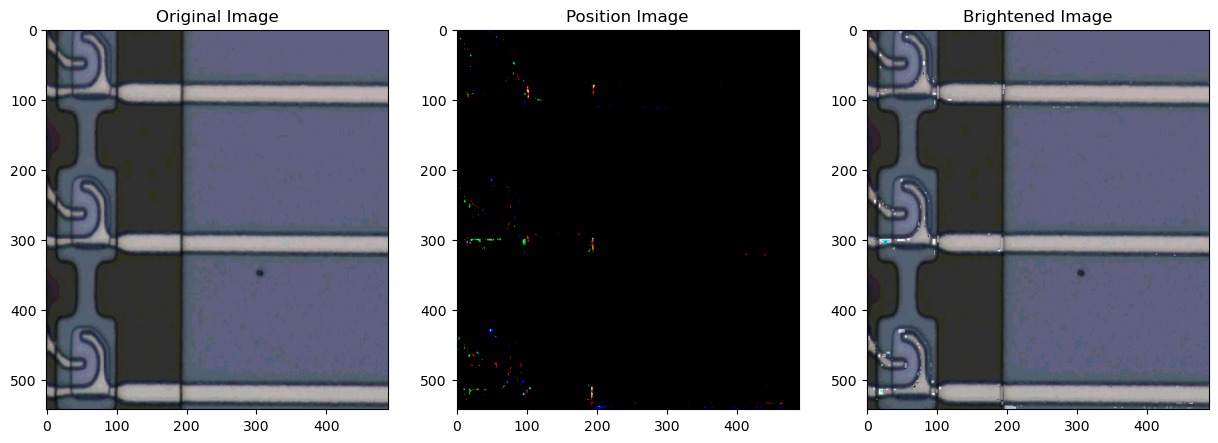

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# 讀取原圖和位置圖
original_image = cv2.imread('../c101_crop_result/origin/D002_c_0004195.png')
brightened_image = cv2.imread('../c101_crop_result/origin/D002_c_0004195.png')
position_image = cv2.imread('../c101_crop_result/attention/D002_c_0004195.png')

# 將位置圖轉為灰度圖
position_gray = cv2.cvtColor(position_image, cv2.COLOR_BGR2GRAY)

# 在位置圖中找到非零像素的位置（即 bounding box 的位置）
_, thresh = cv2.threshold(position_gray, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 將原圖中 bounding box 區域打亮
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    brightened_image[y:y + h, x:x + w, :] += 100  # 將區域的所有通道增加50

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(position_image, cv2.COLOR_BGR2RGB))
plt.title('Position Image')

# 顯示結果
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB))
plt.title('Brightened Image')
plt.show()


In [ ]:
import os
import shutil

label_index = list(range(101))  # 生成0到100的範圍

def rename_jpg_files_by_index(source_folder, destination_folder):
    jpg_files = [file for file in os.listdir(source_folder) if file.endswith(".png")]

    for index in label_index:
        if 0 <= index < len(jpg_files):
            file_to_rename = jpg_files[index]
            source_path = os.path.join(source_folder, file_to_rename)

            # 根據需要修改新文件名，例如，添加索引前綴
            new_file_name = f"0010_{file_to_rename}"

            destination_path = os.path.join(destination_folder, new_file_name)
            shutil.move(source_path, destination_path)

# 範例使用方式
source_folder = "/home/kevin/cifar/train/truck"
destination_folder = '/home/kevin/test_cifar'

rename_jpg_files_by_index(source_folder, destination_folder)


torch.Size([1, 6, 224, 224])


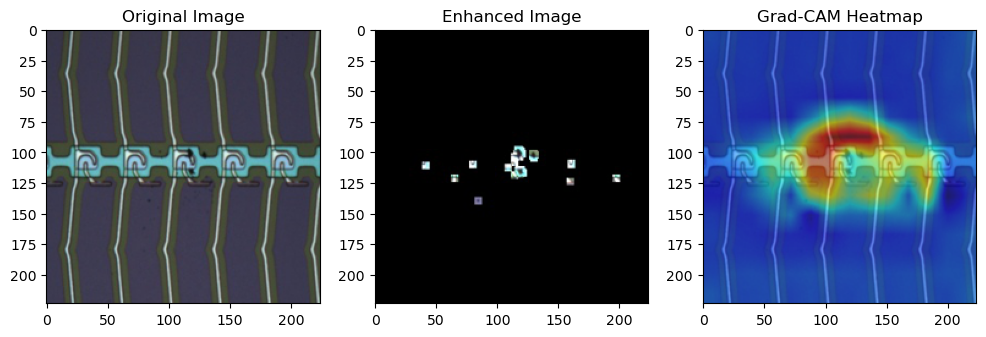

In [31]:
import cv2
import numpy as np
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models
from torchvision import transforms

class ActivationsAndGradients:
    """ Class for extracting activations and
    registering gradients from targeted intermediate layers """

    def __init__(self, model, target_layers, reshape_transform):
        self.model = model
        self.gradients = []
        self.activations = []
        self.reshape_transform = reshape_transform
        self.handles = []
        for target_layer in target_layers:
            self.handles.append(
                target_layer.register_forward_hook(
                    self.save_activation))
            # Backward compatibility with older pytorch versions:
            if hasattr(target_layer, 'register_full_backward_hook'):
                self.handles.append(
                    target_layer.register_full_backward_hook(
                        self.save_gradient))
            else:
                self.handles.append(
                    target_layer.register_backward_hook(
                        self.save_gradient))

    def save_activation(self, module, input, output):
        activation = output
        if self.reshape_transform is not None:
            activation = self.reshape_transform(activation)
        self.activations.append(activation.cpu().detach())

    def save_gradient(self, module, grad_input, grad_output):
        # Gradients are computed in reverse order
        grad = grad_output[0]
        if self.reshape_transform is not None:
            grad = self.reshape_transform(grad)
        self.gradients = [grad.cpu().detach()] + self.gradients

    def __call__(self, x):
        self.gradients = []
        self.activations = []
        return self.model(x)

    def release(self):
        for handle in self.handles:
            handle.remove()


class GradCAM:
    def __init__(self,
                 model,
                 target_layers,
                 reshape_transform=None,
                 use_cuda=False):
        self.model = model.eval()
        self.target_layers = target_layers
        self.reshape_transform = reshape_transform
        self.cuda = use_cuda
        if self.cuda:
            self.model = model.cuda()
        self.activations_and_grads = ActivationsAndGradients(
            self.model, target_layers, reshape_transform)

    """ Get a vector of weights for every channel in the target layer.
        Methods that return weights channels,
        will typically need to only implement this function. """

    @staticmethod
    def get_cam_weights(grads):
        return np.mean(grads, axis=(2, 3), keepdims=True)

    @staticmethod
    def get_loss(output, target_category):
        loss = 0
        for i in range(len(target_category)):
            loss = loss + output[i, target_category[i]]
        return loss

    def get_cam_image(self, activations, grads):
        weights = self.get_cam_weights(grads)
        weighted_activations = weights * activations
        cam = weighted_activations.sum(axis=1)

        return cam

    @staticmethod
    def get_target_width_height(input_tensor):
        width, height = input_tensor.size(-1), input_tensor.size(-2)
        return width, height

    def compute_cam_per_layer(self, input_tensor):
        activations_list = [a.cpu().data.numpy()
                            for a in self.activations_and_grads.activations]
        grads_list = [g.cpu().data.numpy()
                      for g in self.activations_and_grads.gradients]
        target_size = self.get_target_width_height(input_tensor)

        cam_per_target_layer = []
        # Loop over the saliency image from every layer

        for layer_activations, layer_grads in zip(activations_list, grads_list):
            cam = self.get_cam_image(layer_activations, layer_grads)
            cam[cam < 0] = 0  # works like mute the min-max scale in the function of scale_cam_image
            scaled = self.scale_cam_image(cam, target_size)
            cam_per_target_layer.append(scaled[:, None, :])

        return cam_per_target_layer

    def aggregate_multi_layers(self, cam_per_target_layer):
        cam_per_target_layer = np.concatenate(cam_per_target_layer, axis=1)
        cam_per_target_layer = np.maximum(cam_per_target_layer, 0)
        result = np.mean(cam_per_target_layer, axis=1)
        return self.scale_cam_image(result)

    @staticmethod
    def scale_cam_image(cam, target_size=None):
        result = []
        for img in cam:
            img = img - np.min(img)
            img = img / (1e-7 + np.max(img))
            if target_size is not None:
                img = cv2.resize(img, target_size)
            result.append(img)
        result = np.float32(result)

        return result

    def __call__(self, input_tensor, target_category=None):

        if self.cuda:
            input_tensor = input_tensor.cuda()

        # 正向传播得到网络输出logits(未经过softmax)
        output = self.activations_and_grads(input_tensor)
        if isinstance(target_category, int):
            target_category = [target_category] * input_tensor.size(0)

        if target_category is None:
            target_category = np.argmax(output.cpu().data.numpy(), axis=-1)
            print(f"category id: {target_category}")
        else:
            assert (len(target_category) == input_tensor.size(0))

        self.model.zero_grad()
        loss = self.get_loss(output, target_category)
        loss.backward(retain_graph=True)

        # In most of the saliency attribution papers, the saliency is
        # computed with a single target layer.
        # Commonly it is the last convolutional layer.
        # Here we support passing a list with multiple target layers.
        # It will compute the saliency image for every image,
        # and then aggregate them (with a default mean aggregation).
        # This gives you more flexibility in case you just want to
        # use all conv layers for example, all Batchnorm layers,
        # or something else.
        cam_per_layer = self.compute_cam_per_layer(input_tensor)
        return self.aggregate_multi_layers(cam_per_layer)

    def __del__(self):
        self.activations_and_grads.release()

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_value, exc_tb):
        self.activations_and_grads.release()
        if isinstance(exc_value, IndexError):
            # Handle IndexError here...
            print(
                f"An exception occurred in CAM with block: {exc_type}. Message: {exc_value}")
            return True


def show_cam_on_image(img: np.ndarray,
                      mask: np.ndarray,
                      use_rgb: bool = False,
                      colormap: int = cv2.COLORMAP_JET) -> np.ndarray:
    """ This function overlays the cam mask on the image as an heatmap.
    By default the heatmap is in BGR format.

    :param img: The base image in RGB or BGR format.
    :param mask: The cam mask.
    :param use_rgb: Whether to use an RGB or BGR heatmap, this should be set to True if 'img' is in RGB format.
    :param colormap: The OpenCV colormap to be used.
    :returns: The default image with the cam overlay.
    """

    heatmap = cv2.applyColorMap(np.uint8(255 * mask), colormap)
    if use_rgb:
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    heatmap = np.float32(heatmap) / 255

    if np.max(img) > 1:
        raise Exception(
            "The input image should np.float32 in the range [0, 1]")

    cam = heatmap + img
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)


def center_crop_img(img: np.ndarray, size: int):
    h, w, c = img.shape

    if w == h == size:
        return img

    if w < h:
        ratio = size / w
        new_w = size
        new_h = int(h * ratio)
    else:
        ratio = size / h
        new_h = size
        new_w = int(w * ratio)

    img = cv2.resize(img, dsize=(new_w, new_h))

    if new_w == size:
        h = (new_h - size) // 2
        img = img[h: h+size]
    else:
        w = (new_w - size) // 2
        img = img[:, w: w+size]

    return img

import ResnetFFM_V2

def main():
    model = ResnetFFM_V2.FFMResnet(ResBlock=ResnetFFM_V2.Bottleneck, layer_list=[3, 4, 6, 3], num_classes=128, num_channels=6)
    filename = 'checkpoint_0799_FFMResnet_vqvae_256_black_background.pth.tar'
    loaded_state = torch.load(filename)

    state_dict = loaded_state['state_dict']
    for k in list(state_dict.keys()):
                # retain only encoder_q up to before the embedding layer
        if k.startswith("module.encoder_q") and not k.startswith("module.encoder_q.fc"):
            # remove prefix
            state_dict[k[len("module.encoder_q.") :]] = state_dict[k]
        # delete renamed or unused k
            del state_dict[k]
         
    model.load_state_dict(state_dict, strict=False)
    model.eval()
    target_layers = [model.layer3]

    data_transform = transforms.Compose([transforms.ToTensor(),
                                         transforms.Resize([224, 224]),
                                         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    # load image
    img_path1 = "/mnt/backups/zach/vqvae_256_black_background/test/origin/D007_c_0004955.JPG"
    img_path2 = "/mnt/backups/zach/vqvae_256_black_background/test/enhance/D007_c_0004955.JPG"

    assert os.path.exists(img_path1), "file: '{}' dose not exist.".format(img_path1)
    assert os.path.exists(img_path2), "file: '{}' dose not exist.".format(img_path2)

    img1 = Image.open(img_path1)
    img2 = Image.open(img_path2)
    img1 = img1.resize((224, 224))
    img2 = img2.resize((224, 224))

    img1 = np.array(img1, dtype=np.uint8)
    img2 = np.array(img2, dtype=np.uint8)
    # img = center_crop_img(img, 224)

    # [C, H, W]
    img_tensor1 = data_transform(img1)
    img_tensor2 = data_transform(img2)

    img_tensor = torch.cat([img_tensor1, img_tensor2], dim=0)
    # expand batch dimension
    # [C, H, W] -> [N, C, H, W]
    input_tensor = torch.unsqueeze(img_tensor, dim=0)

    cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)
    target_category = 1  # tabby, tabby cat
    # target_category = 254  # pug, pug-dog

    grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)

    grayscale_cam = grayscale_cam[0, :]
    visualization1 = show_cam_on_image(img1.astype(dtype=np.float32) / 255.,
                                      grayscale_cam,
                                      use_rgb=True)

    #visualization2 = show_cam_on_image(img2.astype(dtype=np.float32) / 255.,
    #                                  grayscale_cam,
    #                                  use_rgb=True)
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # Original image
    axs[0].imshow(img1)
    axs[0].set_title('Original Image')

    # Grad-CAM visualization
    axs[1].imshow(img2)
    axs[1].set_title('Enhanced Image')
    
    axs[2].imshow(visualization1)
    axs[2].set_title('Grad-CAM Heatmap')

    plt.show()


if __name__ == '__main__':
    main()

In [11]:
import pickle
import torch
import torch.nn as nn

class FCLayer(nn.Module):
    def __init__(self, in_size=128, out_size=1):
        super(FCLayer, self).__init__()
        self.fc = nn.Sequential(nn.Linear(in_size, out_size))

    def forward(self, feats):
        x = self.fc(feats)
        return feats, x

original_model = FCLayer()
def load_model():
    filename = 'checkpoint_class_1_0199.pth.tar'
    loaded_state = torch.load(filename)

    #state_dict = loaded_state['state_dict']
    original_model.load_state_dict(loaded_state, strict=False)
    return original_model

# 讀取pickle檔案
with open('output_features_FFMResnet_vqvae_256_black_background.pkl', 'rb') as f:
    data = pickle.load(f)

device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('Using CUDA')

else:
    device = torch.device('cpu')
    print('CUDA is not available, using CPU')

# 將資料轉換為Tensor
tensor_data = torch.tensor(data).to(device)

# 切分每個2048維向量成16個128維小向量
small_vectors = tensor_data.view(-1, 16, 128) #(1800, 2048) --> (1800, 16, 128)

# 將資料送入模型執行
model = load_model()
model.eval()
model = model.to(device)

feats, m_index = model(small_vectors)
print(m_index.shape)
print(feats.shape)

i = 0
result_indices = torch.zeros((1800, 128))
for tensor in m_index:
    
    _, m_indices = torch.sort(tensor, 0, descending=True)

    m_feats = torch.index_select(feats[i], dim=0, index=m_indices[0, :])

    result_indices[i] = m_feats
    #print(m_indices.shape)
    #max_tensor, _ = torch.max(tensor, dim=1)
    # 對每個 torch.Size([16, 2]) 的 Tensor 求平均值
    #mean_tensor = torch.mean(tensor, dim=1)
    # 從平均值中選擇一個索引
    #index = torch.argmax(max_tensor).item()
    #result_indices.append(index)
    i = i + 1

# 輸出結果
#print(result_indices)
#print(len(result_indices))

#selected_feats = torch.zeros((1800, 128))  # 创建一个用于存储结果的张量
#for i in range(len(result_indices)):
#    selected_feats[i] = feats[i, result_indices[i]]

#print('selected_feats = ' + str(selected_feats.shape))

#selected_vectors_tensor = torch.stack(selected_vectors, dim=0)
#print(selected_vectors_tensor.shape)

# 將結果存入pickle檔案
with open('selected_feats_correct.pkl', 'wb') as f:
    pickle.dump(result_indices, f)

print("Selected vectors tensor saved to selected_feats_correct.pkl")

Using CUDA


/tmp/ipykernel_610398/3584652643.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_data = torch.tensor(data).to(device)


torch.Size([1800, 16, 1])
torch.Size([1800, 16, 128])
Selected vectors tensor saved to selected_feats_correct.pkl


In [3]:
with open('1.pth', 'rb') as f:
    print(f.read())

b'PK\x03\x04\x00\x00\x08\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\n\x00\x18\x001/data.pklFB\x14\x00ZZZZZZZZZZZZZZZZZZZZ\x80\x02ccollections\nOrderedDict\nq\x00)Rq\x01(X\x18\x00\x00\x00i_classifier.fc.0.weightq\x02ctorch._utils\n_rebuild_tensor_v2\nq\x03((X\x07\x00\x00\x00storageq\x04ctorch\nFloatStorage\nq\x05X\x01\x00\x00\x000q\x06X\x06\x00\x00\x00cuda:0q\x07M\x00\x04tq\x08QK\x00K\x02M\x00\x02\x86q\tM\x00\x02K\x01\x86q\n\x89h\x00)Rq\x0btq\x0cRq\rX\x16\x00\x00\x00i_classifier.fc.0.biasq\x0eh\x03((h\x04h\x05X\x01\x00\x00\x001q\x0fX\x06\x00\x00\x00cuda:0q\x10K\x02tq\x11QK\x00K\x02\x85q\x12K\x01\x85q\x13\x89h\x00)Rq\x14tq\x15Rq\x16X\x17\x00\x00\x00b_classifier.q.0.weightq\x17h\x03((h\x04h\x05X\x01\x00\x00\x002q\x18X\x06\x00\x00\x00cuda:0q\x19J\x00\x00\x01\x00tq\x1aQK\x00K\x80M\x00\x02\x86q\x1bM\x00\x02K\x01\x86q\x1c\x89h\x00)Rq\x1dtq\x1eRq\x1fX\x15\x00\x00\x00b_classifier.q.0.biasq h\x03((h\x04h\x05X\x01\x00\x00\x003q!X\x06\x00\x00\x00cuda:0q"K\x80tq#QK\